In [14]:
import numpy as np
import pandas as pd
from tensorflow.python import keras
from keras import layers

In [15]:
df=pd.read_csv("D:/Dataset/shopof/olist_order_reviews_dataset.csv")

In [16]:
print(df.shape)
df.head()

(100000, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [18]:
# we can remove  review_comment_title since 88% of the values are null. It wont have much impact on the prediction
print("Perentage of null values: ")
(df.isnull().sum()/(df.shape[0]))*100

Perentage of null values: 


review_id                   0.000
order_id                    0.000
review_score                0.000
review_comment_title       88.285
review_comment_message     58.247
review_creation_date        0.000
review_answer_timestamp     0.000
dtype: float64

In [19]:
def unique_data(df,col_name):
    n_vals=df[col_name].nunique()
    u_vals=df[col_name].value_counts()
    return (n_vals,u_vals)

In [20]:
for i in df.columns:
    n_vals,u_vals=unique_data(df,i)
    print("Total size of: {} is {}".format(i,df[i].shape[0])," Count of Unique values: ",n_vals)

Total size of: review_id is 100000  Count of Unique values:  99173
Total size of: order_id is 100000  Count of Unique values:  99441
Total size of: review_score is 100000  Count of Unique values:  5
Total size of: review_comment_title is 100000  Count of Unique values:  4600
Total size of: review_comment_message is 100000  Count of Unique values:  36921
Total size of: review_creation_date is 100000  Count of Unique values:  637
Total size of: review_answer_timestamp is 100000  Count of Unique values:  99010


In [21]:
df.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

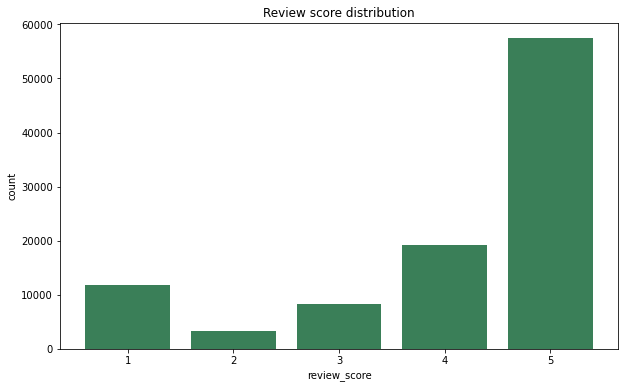

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(df["review_score"],color="seagreen")
plt.title("Review score distribution")
plt.plot()

In [24]:
print("Total messages having socre > 4: ",df["review_comment_message"][df["review_score"]>4].shape[0])
print("Total non null messages having socre > 4: ",df["review_comment_message"][df["review_score"]>4].dropna().shape[0])

Total messages having socre > 4:  57420
Total non null messages having socre > 4:  20646


In [25]:
print("Total messages having socre < 3: ",df["review_comment_message"][df["review_score"]<3].shape[0])
print("Total non null messages having socre < 3: ",df["review_comment_message"][df["review_score"]<3].dropna().shape[0])

Total messages having socre < 3:  15093
Total non null messages having socre < 3:  11408


In [66]:
def cal_len(x):
    return len(x.split())
df["len_words"]=df['review_comment_message'].apply(cal_len)
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,sentiment,len_words
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1,6
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1,15
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,1,30
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,1,7
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,1,9


D:\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

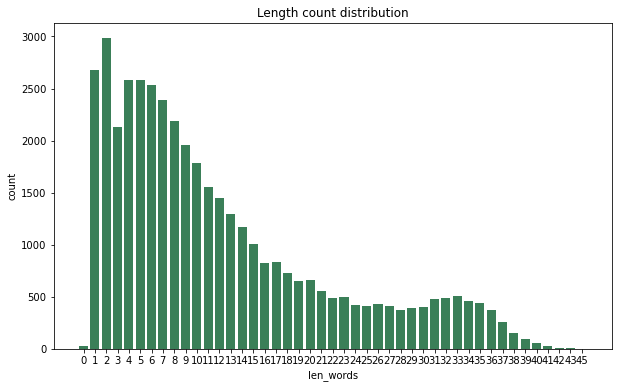

In [68]:
plt.figure(figsize = (10,6))
sns.countplot(df["len_words"].dropna(),color="seagreen")
plt.title("Length count distribution")
plt.plot()

In [26]:
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

messages=[]
stop_words=set(stopwords.words("portuguese"))

In [27]:
messages=[]
for val in df["review_comment_message"].dropna():
    only_letters=re.sub("[^a-zA-Z]"," ",val)
    tokens=word_tokenize(only_letters)
    lower_case=[v.lower() for v in tokens]
    no_stop=list(filter(lambda x:x not in stop_words,lower_case))
    messages.append(' '.join(no_stop))

In [28]:
messages

['recebi bem antes prazo estipulado',
 'parab ns lojas lannister adorei comprar internet seguro pr tico parab ns todos feliz p scoa',
 'aparelho eficiente site marca aparelho impresso desinfector chegar outro nome atualizar marca correta vez aparelho',
 'pouco travando valor ta boa',
 'vendedor confi vel produto ok entrega antes prazo',
 'gostaria saber sempre recebi compra agora decpcionou',
 'p ssimo',
 'loja nota',
 'obrigado aten amim dispensada',
 'compra realizada facilmente entrega efetuada antes prazo dado produto j come ser usado at presente problemas',
 'rel gio bonito barato',
 'n gostei comprei gato lebre',
 'sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo m ximo stark prazo m ximo j esgotou ainda n recebi produto',
 'recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo',
 'recomendo',
 'boa',
 't completamente apaixonada loja super respons vel confi vel',
 'nada chegar pedido',
 'bom cheiroso',
 'otimo vendedo

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
count_vec_1=CountVectorizer(ngram_range=(1,1))
count_transform=count_vec_1.fit_transform(messages)
count_unigams=pd.DataFrame(count_transform.sum(axis=0),columns=count_vec_1.get_feature_names()).T.sort_values(0,ascending=False).head(50)

In [31]:
count_unigams

,0
produto,18866
prazo,8543
entrega,6683
antes,5655
chegou,5643
recebi,5464
bom,4637
recomendo,4362
entregue,3899
veio,3362


In [32]:
count_vec_1=CountVectorizer(ngram_range=(2,2))
count_transform=count_vec_1.fit_transform(messages)
count_bigams=pd.DataFrame(count_transform.sum(axis=0),columns=count_vec_1.get_feature_names()).T.sort_values(0,ascending=False).head(50)
count_bigams

,0
antes prazo,4207
recebi produto,1942
produto chegou,1720
produto entregue,1616
chegou antes,1465
dentro prazo,1092
bem antes,973
parab ns,950
entrega pida,900
produto bom,883


In [33]:
df["review_comment_message"][df["review_score"]==3].dropna().head(2)

73    Eu comprei duas unidades e só recebi uma e ago...
75    Produto bom, porém o que veio para mim não con...
Name: review_comment_message, dtype: object

In [34]:
df["review_comment_message"].head()

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                Recebi bem antes do prazo estipulado.
4    Parabéns lojas lannister adorei comprar pela I...
Name: review_comment_message, dtype: object

In [35]:
df["sentiment"]=np.where(df["review_score"]>3,1,0)

In [36]:
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,sentiment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,1
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,1
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,1
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1


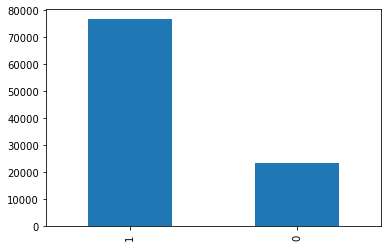

In [37]:
df["sentiment"].value_counts().plot(kind='bar')

In [38]:
#Since 99% of order_id and review_id are unique we can remove these columns from our analysis
from sklearn.model_selection import train_test_split
df=df[df['review_comment_message'].notna()]
X=df['review_comment_message'].replace('\d+', '', regex=True)
y=df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43,stratify=y) #Using stratify to split traina and test data in equal proportions

In [39]:
y_train.value_counts()

1    20010
0    11304
Name: sentiment, dtype: int64

In [40]:
y_test.value_counts()

1    6670
0    3769
Name: sentiment, dtype: int64

In [41]:
print("Training data distribution")
print(y_train.value_counts()/y_train.shape[0])
print("Testing data distribution")
print(y_test.value_counts()/y_test.shape[0])

Training data distribution
1    0.639011
0    0.360989
Name: sentiment, dtype: float64
Testing data distribution
1    0.63895
0    0.36105
Name: sentiment, dtype: float64


In [42]:
#Since we have imbalance dataset we need to use SMOTE to create augment data for our imbalanced class
tf_idf=TfidfVectorizer(ngram_range=(2,2))
x_tr=tf_idf.fit_transform(X_train)
features = (tf_idf.get_feature_names())

In [43]:
x_tes=tf_idf.transform(X_test)

In [44]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(x_tr, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (40020, 98488)
After OverSampling, the shape of train_y: (40020,) 

After OverSampling, counts of label '1': 20010
After OverSampling, counts of label '0': 20010


In [47]:
print('Before OverSampling, the shape of train_X: {}'.format(x_tr.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of train_X: (31314, 98488)
Before OverSampling, the shape of train_y: (31314,) 

Before OverSampling, counts of label '1': 20010
Before OverSampling, counts of label '0': 11304


In [49]:
#After SMOTE our dataset is not imbalanced anymore. Synthesized data is generated
#Now we will implement logistic regression model to predict sentiment

from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty="l2")
lr_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [50]:
test_pred = lr_model.predict(x_tes)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

#We are getting 82% accuracy

              precision    recall  f1-score   support

           0       0.69      0.92      0.79      3769
           1       0.94      0.77      0.85      6670

    accuracy                           0.82     10439
   macro avg       0.82      0.84      0.82     10439
weighted avg       0.85      0.82      0.82     10439



In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print("F1 score: ", f1_score(y_test, test_pred))
print("Accuracy score: ", f1_score(y_test, test_pred))

F1 score:  0.8454800859362088
Accuracy score:  0.8454800859362088


In [64]:
# Ensemble methods are good for handling imbalanced dataset. We will try with Xgboost which a boosting technique where based model
# is built with weak learners and with every iteration the model adjust the weights and weights of wrong prediction are adjusted

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# X=df['review_comment_message'].replace('\d+', '', regex=True)
# y=df["sentiment"]
X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X.values, y.values, test_size=0.25, random_state=43)

tf_idf = TfidfVectorizer(ngram_range=(2,2))
x_tr_xg = tf_idf.fit_transform(X_train)
x_tes_xg = tf_idf.transform(X_test_xg)

xgb = XGBClassifier(n_estimators=150)
xgb.fit(x_tr_xg,y_train_xg)

D:\miniconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:35:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# make predictions for test data
y_pred = xgb.predict(x_tes_xg)


print("F1 score: ", f1_score(y_test_xg, y_pred))
print("Accuracy score: ", f1_score(y_test_xg, y_pred))

F1 score:  0.772648135918833
Accuracy score:  0.772648135918833
